In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
os.listdir("../Scikitlearn/Logistic Regression")

['.ipynb_checkpoints',
 'australia_rain.joblib',
 'slopes.png',
 'Stage2.ipynb',
 'test_inputs.parquet',
 'test_targets.parquet',
 'train_inputs.parquet',
 'train_targets.parquet',
 'val_inputs.to_parquet',
 'val_targets.to_parquet',
 'weatherAUS.csv']

In [3]:
raw_data = pd.read_csv("../Scikitlearn/Logistic Regression/weatherAUS.csv")
raw_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
raw_data.count()[raw_data.count() != 145460 ]

MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

In [8]:
raw_data.dropna(subset=["RainToday", "RainTomorrow"], inplace=True) 

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

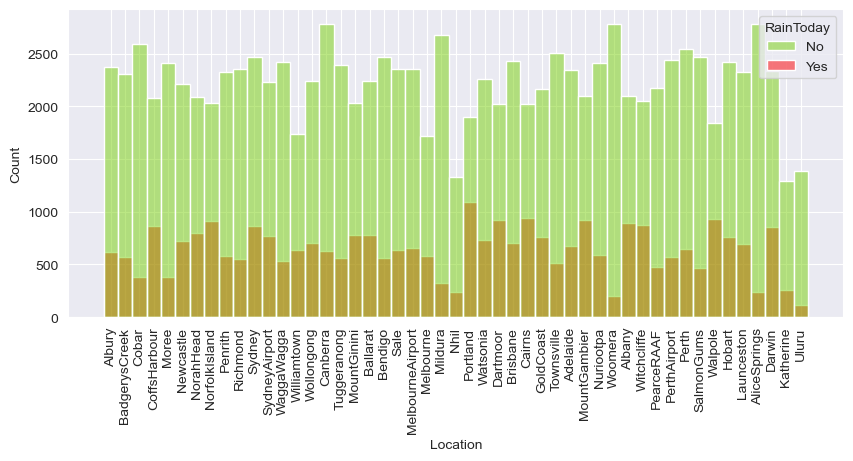

In [10]:
plt.figure(figsize=(10, 4))
sns.histplot(raw_data, x="Location", hue="RainToday", palette={"Yes": "red", "No":"#78d10a80"})
plt.xticks(rotation=90)
plt.show() 

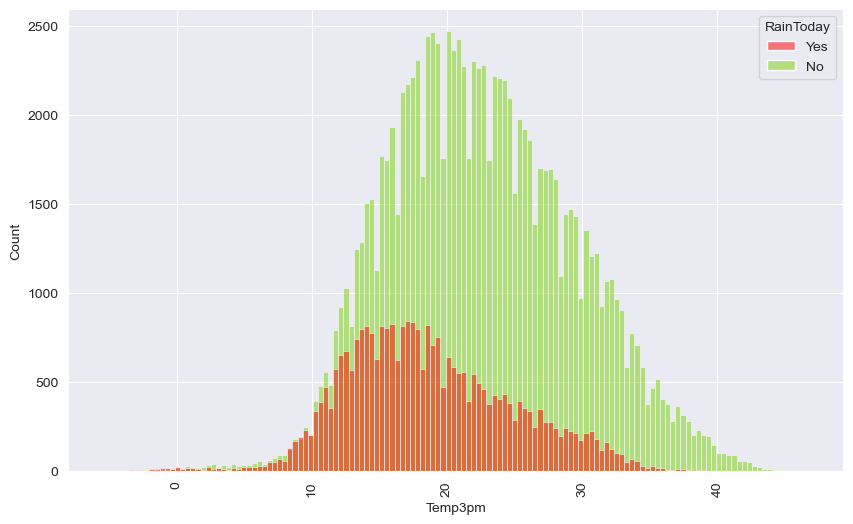

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(raw_data, x="Temp3pm",hue_order=["Yes", "No"], hue="RainToday", palette={"Yes": "red", "No":"#78d10a80"})
plt.xticks(rotation=90)
plt.show() 

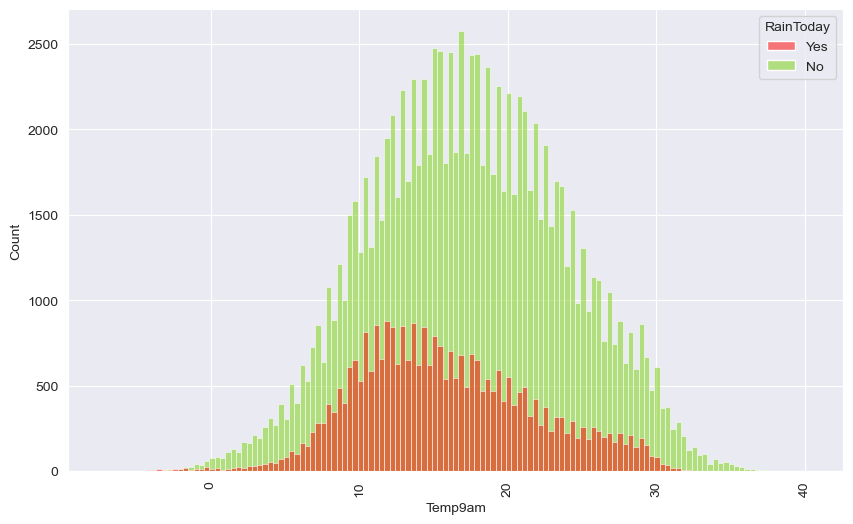

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(raw_data, x="Temp9am",hue_order=["Yes", "No"], hue="RainToday", palette={"Yes": "red", "No":"#78d10a80"})
plt.xticks(rotation=90)
plt.show() 

<Axes: xlabel='RainToday', ylabel='Count'>

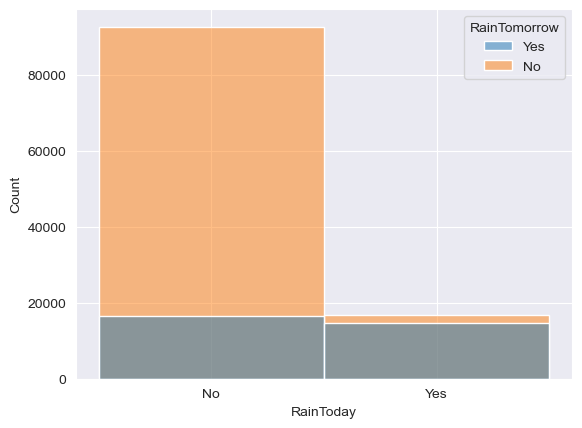

In [13]:
sns.histplot(raw_data,  x="RainToday",hue_order=["Yes", "No"],  hue="RainTomorrow")

In [14]:
cols = raw_data.columns
cols

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<Figure size 1000x400 with 0 Axes>

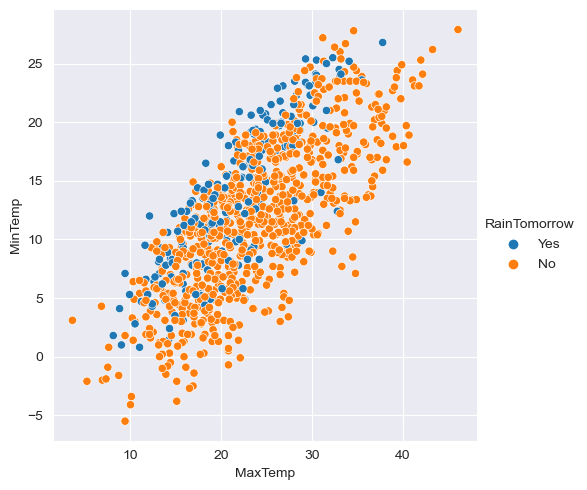

In [15]:
plt.figure(figsize=(10, 4))
sns.relplot(raw_data.sample(1000), x="MaxTemp", y="MinTemp", hue_order=["Yes", "No"], hue="RainTomorrow")

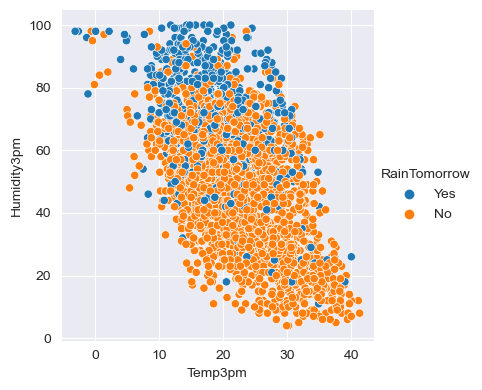

In [16]:
sns.relplot(raw_data.sample(frac=0.02), height=4, x="Temp3pm", y="Humidity3pm", hue="RainTomorrow")

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_val_df, test_df = train_test_split(raw_data, test_size=0.2, random_state=43)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=43)

In [19]:
raw_data["Date"] = pd.DatetimeIndex(raw_data.Date)

In [20]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  object        
 2   MinTemp        140319 non-null  float64       
 3   MaxTemp        140480 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81093 non-null   float64       
 6   Sunshine       73982 non-null   float64       
 7   WindGustDir    131624 non-null  object        
 8   WindGustSpeed  131682 non-null  float64       
 9   WindDir9am     131127 non-null  object        
 10  WindDir3pm     137117 non-null  object        
 11  WindSpeed9am   139732 non-null  float64       
 12  WindSpeed3pm   138256 non-null  float64       
 13  Humidity9am    139270 non-null  float64       
 14  Humidity3pm    137286 non-null  float64       
 15  

In [27]:
raw_data["Year"] = raw_data["Date"].dt.year

<Axes: xlabel='Year', ylabel='count'>

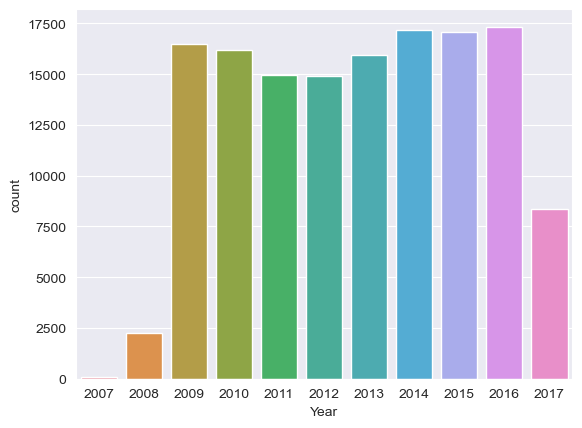

In [29]:
sns.countplot(x=raw_data["Year"])

In [32]:
train_df = raw_data[raw_data["Year"] < 2015]
val_df = raw_data[raw_data["Year"] == 2015]
test_df = raw_data[raw_data["Year"] > 2015]

In [34]:
train_df.shape

(97988, 24)

In [35]:
val_df.shape

(17089, 24)

In [36]:
test_df.shape

(25710, 24)

In [37]:
train_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year'],
      dtype='object')

In [42]:
input_cols= list(train_df.columns)[1:-2]
target_col = "RainTomorrow"
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [44]:
train_inputs = train_df[input_cols].copy()
val_inputs = val_df[input_cols].copy()
test_inputs = test_df[input_cols].copy()

In [45]:
train_target = train_df[target_col].copy()
val_target = val_df[target_col].copy()
test_target = test_df[target_col].copy()

In [47]:
numeric_cols = train_inputs.select_dtypes(np.number).columns.tolist()
categoric_cols = train_inputs.select_dtypes("object").columns.tolist()

In [53]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [59]:
train_inputs[numeric_cols].isnull().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [63]:
# data = [train_inputs, test_inputs, val_inputs]
# all_data_inputs = np.concatenate()
# np.concatenate()
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,...,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,...,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,...,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,...,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No


In [50]:
train_inputs[categoric_cols]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No
...,...,...,...,...,...
144548,Uluru,SSE,ESE,SSE,No
144549,Uluru,NE,ENE,SW,No
144550,Uluru,ESE,ESE,SSE,No
144551,Uluru,ESE,ESE,SSW,No


In [52]:
train_inputs[categoric_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [74]:
np.concatenate((train_inputs, val_inputs)).shape

TypeError: _append_dispatcher() missing 1 required positional argument: 'values'

In [70]:
raw_data.shape

(140787, 24)

In [86]:
a = pd.DataFrame({"a":[2,3,4], "b": [5,6,7]})
b = pd.DataFrame({"a":[12,13,14], "b": [15,16,17]})
a

,a,b
0,2,5
1,3,6
2,4,7


In [97]:
np.concatenate((a, b))

array([[ 2,  5],
       [ 3,  6],
       [ 4,  7],
       [12, 15],
       [13, 16],
       [14, 17]], dtype=int64)

In [98]:
np.vstack(a, b)

TypeError: _vhstack_dispatcher() takes 1 positional argument but 2 were given